In [1]:
!pip install opencv-python==4.5.1.48

In [2]:
!sudo apt install libgl1-mesa-glx -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (18.3.6-2+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [7]:
# Import required libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
content_image = cv2.imread("images/perfil.jpg")
(h, w) = content_image.shape[:2]

# load the style image for visual purposes only
style_image = cv2.imread("images/the-scream.jpg")

# Load the network from existing torch network
net = cv2.dnn.readNetFromTorch("images/the_scream.t7")

In [30]:
# Find mean RBG color values from content image
avg_B = np.sum(content_image[:,:,0])/240000
avg_G = np.sum(content_image[:,:,1])/240000
avg_R = np.sum(content_image[:,:,2])/240000

In [31]:
# Feed image into network and run forward pass
blob = cv2.dnn.blobFromImage(content_image, 1.0, (w, h), (103.939, 116.779, 123.680))
net.setInput(blob)
output = net.forward()

In [32]:
# Reshape the output tensor, add back in the mean subtraction, swap channel order
output = output.reshape((3, output.shape[2], output.shape[3]))
output[0] += avg_R
output[1] += avg_B
output[2] += avg_G
output /= 255.0
output = output.transpose(1, 2, 0)

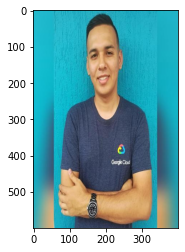

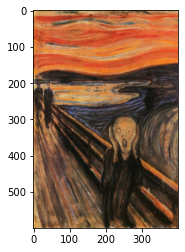

In [33]:
# Show images
# as opencv loads in BGR format by default, we want to show it in RGB.

plt.imshow(cv2.cvtColor(content_image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(style_image, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


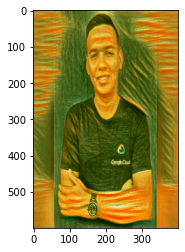

In [38]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.savefig('images/sergio_perfil.jpg')
plt.show()